## PCA

In [2]:
import pandas as pd

In [3]:
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [4]:
X = df[['calory','breakfast','lunch','dinner','exercise']]
Y = df[['body_shape']]

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
x_std = StandardScaler().fit_transform(X)

In [7]:
x_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

## 공분산 행렬

In [9]:
import numpy as np

In [10]:
f = x_std.T
cov_matrix = np.cov(f) #공분산 만들기
print(cov_matrix)
#'calory', 'breakfast', 'lunch', 'dinner', 'exercise'

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


In [11]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [12]:
print('고유벡터 \n %s' %eig_vecs)

고유벡터 
 [[ 0.508005    0.0169937  -0.84711404  0.11637853  0.10244985]
 [ 0.44660335  0.36890361  0.12808055 -0.63112016 -0.49973822]
 [ 0.38377913 -0.70804084  0.20681005 -0.40305226  0.38232213]
 [ 0.42845209  0.53194699  0.3694462   0.22228235  0.58954327]
 [-0.46002038  0.2816592  -0.29450345 -0.61341895  0.49601841]]


In [13]:
print('고유값 \n %s' %eig_vals)

고유값 
 [4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]


In [14]:
eig_vals[0]/sum(eig_vals) #73% 데이터의 특성을 담는다
#5차원 -> 1차원(eig_vals[0])으로 축소하면 73%만큼의 데이터의 특성을 살린다

0.7318321731427544

In [15]:
#첫번째 고유벡터에 데이터를 정사영
projected_x = x_std.dot(eig_vecs.T[0])
projected_x

array([-2.22600943, -0.0181432 ,  1.76296611, -2.73542407,  3.02711544,
       -2.14702579, -0.37142473,  2.59239883, -0.39347815,  0.50902498])

In [16]:
x_std.shape #10행 5열
eig_vecs.T[0].shape #5행 1열

(5,)

In [17]:
res = pd.DataFrame(projected_x, columns=['PC1'])
res
res['yaxis'] = 0.0
res['label'] = Y
res

,PC1,yaxis,label
0,-2.226009,0.0,Skinny
1,-0.018143,0.0,Normal
2,1.762966,0.0,Fat
3,-2.735424,0.0,Skinny
4,3.027115,0.0,Fat
5,-2.147026,0.0,Skinny
6,-0.371425,0.0,Normal
7,2.592399,0.0,Fat
8,-0.393478,0.0,Normal
9,0.509025,0.0,Fat


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'PCA result')

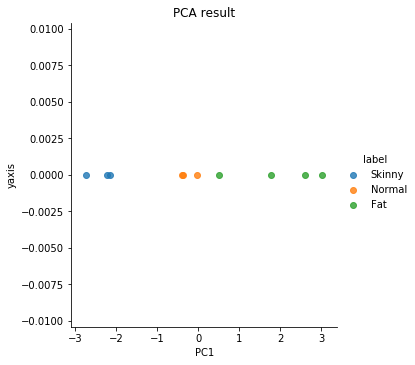

In [19]:
sns.lmplot('PC1','yaxis',data=res, hue='label', fit_reg=False)
plt.title('PCA result')

In [21]:
# 1. userid 1인 사람에게 추천하고자 하는 영화는?
# rating?
# -knn
# -상관계수 => 유사한 사람 => 추천점수

In [22]:
import pandas as pd

In [23]:
movie = pd.read_csv("movielens/ratings.csv")
movie

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
1048570,7120,168,5.0,1175543061
1048571,7120,253,4.0,1175542225
1048572,7120,260,5.0,1175542035
1048573,7120,261,4.0,1175543376


In [24]:
movie.drop('timestamp', axis=1, inplace=True)
movie

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
...,...,...,...
1048570,7120,168,5.0
1048571,7120,253,4.0
1048572,7120,260,5.0
1048573,7120,261,4.0


In [25]:
movie = movie.pivot_table('rating', index='userId',columns='movieId')
movie

movieId,1,2,3,4,5,6,7,8,9,10,...,129350,129354,129428,129707,130052,130073,130219,130462,130490,130642
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7116,4.0,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7117,4.0,NaN,4.0,NaN,NaN,5.0,3.0,NaN,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#1. userId 1와의 상관계수

In [27]:
from math import sqrt
import numpy as np

In [28]:
movieID = list(movie.index) #전체 ID 목록
movieID

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [29]:
np.isnan(movie.loc[1])

movieId
1          True
2         False
3          True
4          True
5          True
          ...  
130073     True
130219     True
130462     True
130490     True
130642     True
Name: 1, Length: 14026, dtype: bool

In [30]:
movie1 = movie.loc[:,np.isnan(movie.loc[1])] #ID 1이 보지 않은 영화들
movie1

movieId,1,3,4,5,6,7,8,9,10,11,...,129350,129354,129428,129707,130052,130073,130219,130462,130490,130642
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7116,4.0,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7117,4.0,4.0,NaN,NaN,5.0,3.0,NaN,1.0,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
movieID_1 = list(movie.loc[:,movie.loc[1,:].notnull()].columns) #1이 본 영화들
movieID_1

[2,
 29,
 32,
 47,
 50,
 112,
 151,
 223,
 253,
 260,
 293,
 296,
 318,
 337,
 367,
 541,
 589,
 593,
 653,
 919,
 924,
 1009,
 1036,
 1079,
 1080,
 1089,
 1090,
 1097,
 1136,
 1193,
 1196,
 1198,
 1200,
 1201,
 1208,
 1214,
 1215,
 1217,
 1219,
 1222,
 1240,
 1243,
 1246,
 1249,
 1258,
 1259,
 1261,
 1262,
 1266,
 1278,
 1291,
 1304,
 1321,
 1333,
 1348,
 1350,
 1358,
 1370,
 1374,
 1387,
 1525,
 1584,
 1750,
 1848,
 1920,
 1967,
 1994,
 1997,
 2021,
 2100,
 2118,
 2138,
 2140,
 2143,
 2173,
 2174,
 2193,
 2194,
 2253,
 2288,
 2291,
 2542,
 2628,
 2644,
 2648,
 2664,
 2683,
 2692,
 2716,
 2761,
 2762,
 2804,
 2872,
 2918,
 2944,
 2947,
 2959,
 2968,
 3000,
 3030,
 3037,
 3081,
 3153,
 3265,
 3438,
 3476,
 3479,
 3489,
 3499,
 3889,
 3932,
 3996,
 3997,
 4011,
 4027,
 4105,
 4128,
 4133,
 4226,
 4306,
 4446,
 4467,
 4571,
 4720,
 4754,
 4878,
 4896,
 4911,
 4915,
 4941,
 4980,
 4993,
 5026,
 5039,
 5040,
 5146,
 5171,
 5540,
 5679,
 5797,
 5816,
 5898,
 5952,
 5999,
 6093,
 6242,
 6333

In [32]:
simList=[]
for name in movieID:
    if name==1: continue
    sumX=0
    sumY=0
    sumSqX=0
    sumSqY=0
    sumXY=0
    cnt=0
    for m in movieID_1:
        if not np.isnan(movie.loc[name,m]):
            sumX+=movie.loc[1,m]
            sumY+=movie.loc[name,m]
            sumSqX+=pow(movie.loc[1,m],2)
            sumSqY+=pow(movie.loc[name,m],2)
            sumXY+=movie.loc[1,m]*movie.loc[name,m]
            cnt+=1

    if cnt==0: continue
        
    sim = ((sumXY-((sumX*sumY)/cnt))+1e-10) / (sqrt((sumSqX-(pow(sumX,2)/cnt))*(sumSqY-(pow(sumY,2)/cnt)))+1e-10)
    simList.append((sim,name))
print(simList)

[(-0.06933752448366226, 2), (0.22531203183445075, 3), (1.0, 4), (0.46767710249625366, 5), (1.0, 6), (0.08028463952724611, 7), (9.258200996868438e-11, 8), (9.999999999e-11, 9), (0.52876059419877, 10), (0.2194820105744304, 11), (1.6329931615887856e-10, 12), (0.5477225575381958, 13), (-0.47329441294309577, 14), (1.0, 15), (-0.4082482903201346, 16), (-0.9999999991999999, 17), (-0.42658964176626546, 18), (1.0, 19), (-0.5555555554345616, 20), (-0.047729867046586105, 21), (1.7775144617738055e-11, 22), (-0.04423739548573249, 23), (0.14441806963126533, 24), (-0.10128466743267221, 25), (-0.04637388949837774, 26), (-0.09713990062362511, 27), (0.6882472016402936, 28), (0.5834500350252759, 29), (0.500000000149996, 30), (0.3604588958098146, 31), (0.1685499656662572, 32), (1.0, 33), (-0.5590169942006401, 34), (0.06156850229710381, 35), (1.0, 36), (1.0, 37), (-0.7777777776197531, 38), (0.6488856845458335, 39), (-0.27937211825422087, 40), (0.7559289460461324, 41), (0.38087753710970934, 42), (-0.2084222

In [34]:
#2. userid 1에게 영화 추천

In [35]:
movie.columns

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            129350, 129354, 129428, 129707, 130052, 130073, 130219, 130462,
            130490, 130642],
           dtype='int64', name='movieId', length=14026)

In [36]:
movie1.loc[2,3]

4.0

In [37]:
expectedSum=0 #유사도*평점 총합
simSum=0  #유사도 총합
myList=[] #예상 평점 \
for m in movie1: #1이 보지 않은 영화 중에서
    for sim,name in simList:
        if sim < 0: continue 
        if not np.isnan(movie1.loc[name,m]): #다른 사람들은 본 영화
#           print(sim)
#           print(movie1.loc[name,m])
            expectedSum+=sim*movie1.loc[name,m] #유사도*평점 총합
#           print('ex',sim*movie1.loc[name,m])
            simSum+=sim #유사도 총합
#           print('-' *50)
            res = expectedSum/simSum
            myList.append((res,m))
#           print('=' * 50)
print(myList)

KeyboardInterrupt: 